#### Convolutional Neural Network

## Data Augmentation

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
# Convolutional Neural Network
# Importing the libraries
import tensorflow as tf
# Convolutional Neural Network
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img,array_to_img,ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


img = load_img(r"G:\Courses\Car_Bus_bike_datasets\test\bike\bike4.jpeg") 

x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)



# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=r'G:\Courses\Car_Bus_bike_datasets\test\bike', save_prefix='bike', save_format='jpeg'):
    i += 1
    if i > 100:
        break  # otherwise the generator would loop indefinitely



#### Loading Data into the drive

In [29]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -uq "/content/drive/My Drive/hackerearth.zip" -d "/content/drive/My Drive/hackerearth"

In [30]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [31]:
training_set = train_datagen.flow_from_directory(directory = "/content/drive/My Drive/Car_Bus_bike_datasets/train1",
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                class_mode = "categorical")

Found 897 images belonging to 3 classes.


In [36]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_datagen = test_datagen.flow_from_directory(directory = "/content/drive/My Drive/Car_Bus_bike_datasets/newtest", 
                                                batch_size = 128,
                                                class_mode="categorical",
                                                target_size = (224,224))

Found 607 images belonging to 3 classes.


In [11]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.applications.resnet50 import ResNet50

In [12]:
resnet = ResNet50(include_top=False,weights="imagenet",input_shape=(224,224,3))

94773248/94765736 [==============================] - 1s 0us/step


In [37]:
for layers in resnet.layers:
    layers.trainable=False

In [38]:
flatten = Flatten()(resnet.output)

dense =Dense(3,activation='softmax')(flatten)

In [39]:
model =Model(inputs=resnet.input,outputs=dense)

In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [41]:
model.compile(optimizer="Adam",
             loss="categorical_crossentropy",
             metrics='accuracy')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",patience=10)

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="tf.h5",save_best_only=True)

In [42]:
model1 = model.fit(training_set,validation_data=test_datagen,epochs=3,callbacks=[early_stopping,checkpoint])

Epoch 1/3
8/8 [==============================] - 24s 3s/step - loss: 5.8616 - accuracy: 0.3496 - val_loss: 4.5370 - val_accuracy: 0.4333
Epoch 2/3
8/8 [==============================] - 20s 2s/step - loss: 3.8119 - accuracy: 0.4646 - val_loss: 5.4331 - val_accuracy: 0.3344
Epoch 3/3
8/8 [==============================] - 20s 2s/step - loss: 2.1274 - accuracy: 0.5978 - val_loss: 3.7613 - val_accuracy: 0.4448


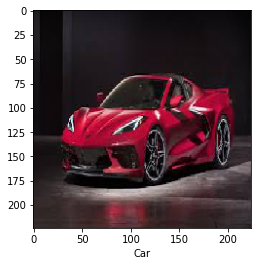

In [59]:
img = image.load_img("/content/drive/My Drive/Car_Bus_bike_datasets/train1/Bus/bus2.jpeg",target_size=(224,224))
##img = image.load_img("/content/drive/My Drive/cartest.jpeg",target_size=(224,224))
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(img)
plt.xlabel("Bus")

# Part 4 - Making a single prediction
test_image = image.img_to_array(img)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

AxesImage(54,36;334.8x217.44)
It's a Bus


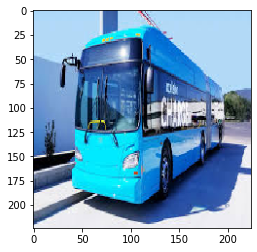

In [60]:
res = np.argmax(result,axis=1)
if res==0:
  print(plt.imshow(load_img("/content/drive/My Drive/Car_Bus_bike_datasets/train1/Bus/bus1.jpeg",target_size=(224,224))))
  print("It's a Bus")
elif res==1:
  print(plt.imshow(load_img("/content/drive/My Drive/Car_Bus_bike_datasets/train1/Car/car1.jpeg",target_size=(224,224)))) 
  print("It's a Car")
else:
  print(plt.imshow(load_img("/content/drive/My Drive/Car_Bus_bike_datasets/train1/bike/bike1.jpeg",target_size=(224,224))))   
  print("It's a Bike")